# Training Data Visualization 

In [1]:
# Importing packages 
from os import path

import pandas as pd

import numpy as np 

from openpyxl import load_workbook

import csv

import sys
sys.path.append("../..")
from DexterousManipulation.training.data_loader import load_filtered_sequences, load_data_two_classes_seq

In [2]:
# Plotting session 
plot_session = 6 

In [3]:
# All folders 
basepath = path.abspath('')

folder_small_big_2 = path.abspath(path.join(basepath, "..", "Figures/Training/500k_Data_Set/Big_Cube_and_Small_Cube/seq_len_2_no_redraw"))
folder_small_big_5 = path.abspath(path.join(basepath, "..", "Figures/Training/500k_Data_Set/Big_Cube_and_Small_Cube/seq_len_5_no_redraw"))
folder_small_big_10 = path.abspath(path.join(basepath, "..", "Figures/Training/500k_Data_Set/Big_Cube_and_Small_Cube/seq_len_10_no_redraw"))

folder_medium_big_2 = path.abspath(path.join(basepath, "..", "Figures/Training/500k_Data_Set/Big_Cube_and_Medium_Cube/seq_len_2_no_redraw"))
folder_medium_big_5 = path.abspath(path.join(basepath, "..", "Figures/Training/500k_Data_Set/Big_Cube_and_Medium_Cube/seq_len_5_no_redraw"))
folder_medium_big_10 = path.abspath(path.join(basepath, "..", "Figures/Training/500k_Data_Set/Big_Cube_and_Medium_Cube/seq_len_10_no_redraw"))

folder_cyli_big_2 = path.abspath(path.join(basepath, "..", "Figures/Training/500k_Data_Set/Big_Cube_and_Cylinder/seq_len_2_no_redraw"))
folder_cyli_big_5 = path.abspath(path.join(basepath, "..", "Figures/Training/500k_Data_Set/Big_Cube_and_Cylinder/seq_len_5_no_redraw"))
folder_cyli_big_10 = path.abspath(path.join(basepath, "..", "Figures/Training/500k_Data_Set/Big_Cube_and_Cylinder/seq_len_10_no_redraw"))

# small cube still unstable in current setting ... 
# now weird, but 'expected' behaviour
data_small_big_2 = load_workbook(folder_small_big_2 + '/Log_loss_acc_training_50_nb_epochs_1000.xlsx') # other architecture for this run (other one unstable)
data_small_big_5 = load_workbook(folder_small_big_5 + '/Log_loss_acc_training_50_nb_epochs_1000.xlsx') # 
data_small_big_10 = load_workbook(folder_small_big_10 + '/Log_loss_acc_training_50_nb_epochs_1000.xlsx') # keeping old one, because not yet saved ... 

data_medium_big_2 = load_workbook(folder_medium_big_2 + '/Log_loss_acc_training_30_nb_epochs_1000.xlsx')
data_medium_big_5 = load_workbook(folder_medium_big_5 + '/Log_loss_acc_training_30_nb_epochs_1000.xlsx') 
data_medium_big_10 = load_workbook(folder_medium_big_10 + '/Log_loss_acc_training_30_nb_epochs_1000.xlsx')# Log_loss_acc_training_2_nb_epochs_1000

data_cyli_big_2 = load_workbook(folder_cyli_big_2 + '/Log_loss_acc_training_30_nb_epochs_1000.xlsx')
data_cyli_big_5 = load_workbook(folder_cyli_big_5 + '/Log_loss_acc_training_30_nb_epochs_1000.xlsx') 
data_cyli_big_10 = load_workbook(folder_cyli_big_10 + '/Log_loss_acc_training_30_nb_epochs_1000.xlsx')

data_sheet_small_big_2 = data_small_big_2.active
data_sheet_small_big_5 = data_small_big_5.active
data_sheet_small_big_10 = data_small_big_10.active

data_sheet_medium_big_2 = data_medium_big_2.active
data_sheet_medium_big_5 = data_medium_big_5.active
data_sheet_medium_big_10 = data_medium_big_10.active

data_sheet_cyli_big_2 = data_cyli_big_2.active
data_sheet_cyli_big_5 = data_cyli_big_5.active
data_sheet_cyli_big_10 = data_cyli_big_10.active

In [4]:
# Declaring data 
epochs_small_big_2 = [] 
training_losses_small_big_2 = [] 
validation_losses_small_big_2 = []
training_accs_small_big_2 = [] 
validation_accs_small_big_2 = [] 

epochs_small_big_5 = [] 
training_losses_small_big_5 = [] 
validation_losses_small_big_5 = []
training_accs_small_big_5 = [] 
validation_accs_small_big_5 = [] 

epochs_small_big_10 = [] 
training_losses_small_big_10 = [] 
validation_losses_small_big_10 = []
training_accs_small_big_10 = [] 
validation_accs_small_big_10 = [] 



epochs_medium_big_2 = [] 
training_losses_medium_big_2 = [] 
validation_losses_medium_big_2 = []
training_accs_medium_big_2 = [] 
validation_accs_medium_big_2 = [] 

epochs_medium_big_5 = [] 
training_losses_medium_big_5 = [] 
validation_losses_medium_big_5 = []
training_accs_medium_big_5 = [] 
validation_accs_medium_big_5 = [] 

epochs_medium_big_10 = [] 
training_losses_medium_big_10 = [] 
validation_losses_medium_big_10 = []
training_accs_medium_big_10 = [] 
validation_accs_medium_big_10 = [] 



epochs_cyli_big_2 = [] 
training_losses_cyli_big_2 = [] 
validation_losses_cyli_big_2 = []
training_accs_cyli_big_2 = [] 
validation_accs_cyli_big_2 = [] 

epochs_cyli_big_5 = [] 
training_losses_cyli_big_5 = [] 
validation_losses_cyli_big_5 = []
training_accs_cyli_big_5 = [] 
validation_accs_cyli_big_5 = [] 

epochs_cyli_big_10 = [] 
training_losses_cyli_big_10 = [] 
validation_losses_cyli_big_10 = []
training_accs_cyli_big_10 = [] 
validation_accs_cyli_big_10 = [] 

In [5]:
# Function for loading from a xlsx file 
def load_from_xlsx(data_sheet): 
    epochs = [] 
    training_losses = [] 
    validation_losses = [] 
    training_accs = [] 
    validation_accs = [] 
    line_counter = 2
    while data_sheet.cell(line_counter, 1).value !=  None: 
        epochs.append(int(data_sheet.cell(line_counter, 1).value))
        training_losses.append(float(data_sheet.cell(line_counter, 2).value))
        validation_losses.append(float(data_sheet.cell(line_counter, 3).value))
        training_accs.append(float(data_sheet.cell(line_counter, 4).value)*100)
        validation_accs.append(float(data_sheet.cell(line_counter, 5).value)*100)
        line_counter += 1 
    
    return epochs, training_losses, validation_losses, training_accs, validation_accs 

In [6]:
epochs_small_big_2, training_losses_small_big_2, validation_losses_small_big_2, training_accs_small_big_2, validation_accs_small_big_2 = load_from_xlsx(data_sheet_small_big_2)
epochs_small_big_5, training_losses_small_big_5, validation_losses_small_big_5, training_accs_small_big_5, validation_accs_small_big_5 = load_from_xlsx(data_sheet_small_big_5)
epochs_small_big_10, training_losses_small_big_10, validation_losses_small_big_10, training_accs_small_big_10, validation_accs_small_big_10 = load_from_xlsx(data_sheet_small_big_10)

epochs_medium_big_2, training_losses_medium_big_2, validation_losses_medium_big_2, training_accs_medium_big_2, validation_accs_medium_big_2 = load_from_xlsx(data_sheet_medium_big_2)
epochs_medium_big_5, training_losses_medium_big_5, validation_losses_medium_big_5, training_accs_medium_big_5, validation_accs_medium_big_5 = load_from_xlsx(data_sheet_medium_big_5)
epochs_medium_big_10, training_losses_medium_big_10, validation_losses_medium_big_10, training_accs_medium_big_10, validation_accs_medium_big_10 = load_from_xlsx(data_sheet_medium_big_10)

epochs_cyli_big_2, training_losses_cyli_big_2, validation_losses_cyli_big_2, training_accs_cyli_big_2, validation_accs_cyli_big_2 = load_from_xlsx(data_sheet_cyli_big_2)
epochs_cyli_big_5, training_losses_cyli_big_5, validation_losses_cyli_big_5, training_accs_cyli_big_5, validation_accs_cyli_big_5 = load_from_xlsx(data_sheet_cyli_big_5)
epochs_cyli_big_10, training_losses_cyli_big_10, validation_losses_cyli_big_10, training_accs_cyli_big_10, validation_accs_cyli_big_10 = load_from_xlsx(data_sheet_cyli_big_10)

## Plotting the data 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [8]:
import seaborn as sns
sns.set()

In [9]:
best_font_size = 20

In [19]:
def plot_losses(epochs, training_losses, validation_losses, folder_name, title): 
    # Plotting the losses 
    plt.figure(figsize=(12, 6), dpi=100)
    plt.plot(epochs, training_losses, label = "training loss")
    plt.plot(epochs, validation_losses, label = "validation loss")
    plt.xlabel("Epoch", Fontsize = best_font_size+2)
    plt.ylabel("Categorical Crossentropy", Fontsize = best_font_size+2)
    # plt.title(title)
    plt.xticks(fontsize=best_font_size)
    plt.yticks(fontsize=best_font_size)
    plt.legend(loc='upper right', prop={"size":best_font_size})
    plt.savefig(folder_name + "/training_validation_losses_plot_" + str(len(epochs)) + "_epochs_V" + str(plot_session) +".png")
    plt.show()

In [20]:
def plot_accuracies(epochs, training_accs, validation_loss, folder_name, title):
    # Plotting the accuracies  
    plt.figure(figsize=(12, 6), dpi=100)
    plt.plot(epochs, training_accs, label = "training accuracy")
    plt.plot(epochs, validation_loss, label = "validation accuracy")
    plt.xlabel("Epoch", Fontsize = best_font_size+2)
    plt.ylabel("Categorical accuracy", Fontsize = best_font_size+2)
    # plt.title(title)
    plt.xticks(fontsize=best_font_size)
    plt.yticks(fontsize=best_font_size)
    plt.legend(loc='lower right', prop={"size":best_font_size})
    plt.savefig(folder_name + "/training_validation_accuracies_plot_" + str(len(epochs)) + "_epochs_V" + str(plot_session) +".png")
    plt.show()

### Sequence length: 2 

#### Small vs Big Cube 

Training and validation loss: Small Cube vs Big Cube: 2 Grasps, 1000 epochs


C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


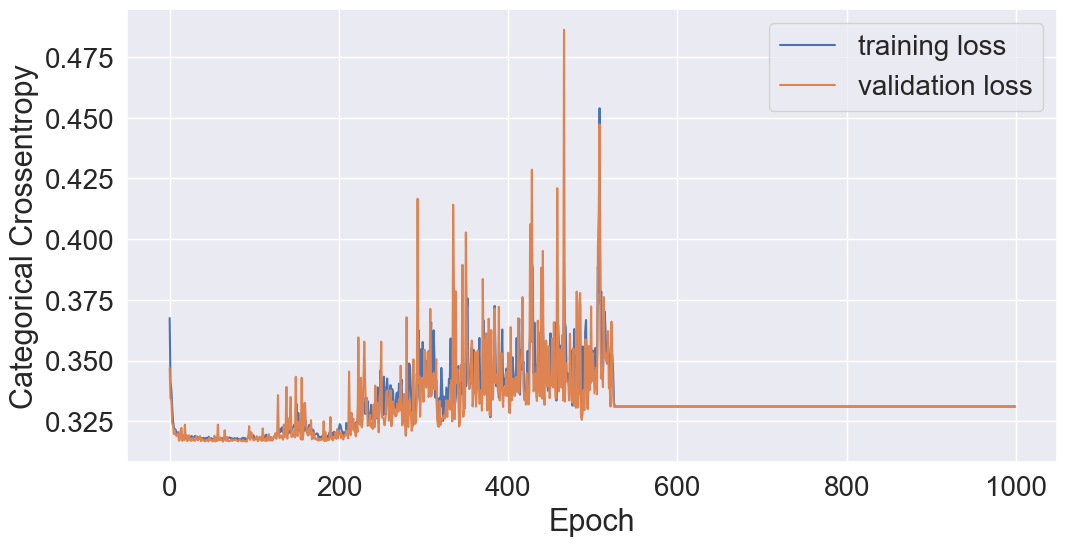

Training and validation accuracy: Small Cube vs Big Cube: 2 Grasps, 1000 epochs


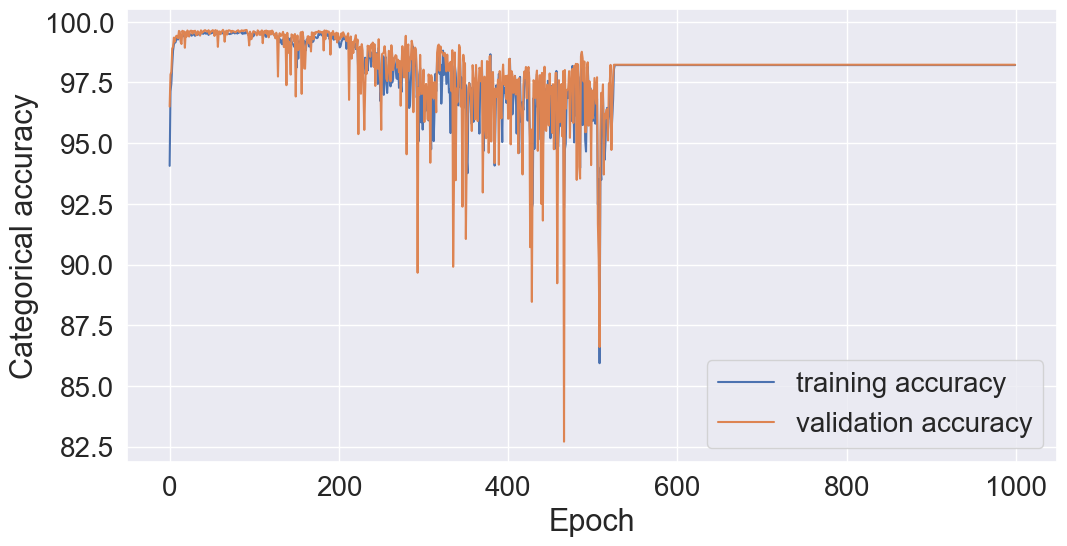

Highest validation accuracy achieved:  99.667


In [21]:
print("Training and validation loss: Small Cube vs Big Cube: 2 Grasps, 1000 epochs")
plot_losses(epochs_small_big_2, training_losses_small_big_2, validation_losses_small_big_2, folder_small_big_2, "")
print("Training and validation accuracy: Small Cube vs Big Cube: 2 Grasps, 1000 epochs")
plot_accuracies(epochs_small_big_2, training_accs_small_big_2, validation_accs_small_big_2, folder_small_big_2, "")
print("Highest validation accuracy achieved: ", max(validation_accs_small_big_2))

#### Medium vs Big Cube 

Training and validation loss: Medium Cube vs Big Cube: 2 Grasps, 1000 epochs


C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


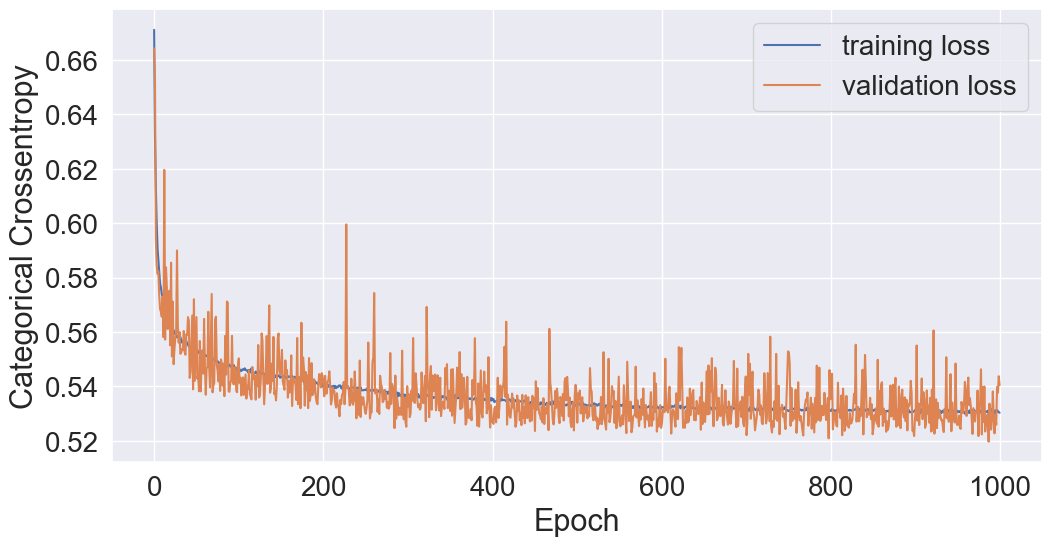

Training and validation accuracy: Medium Cube vs Big Cube: 2 Grasps, 1000 epochs


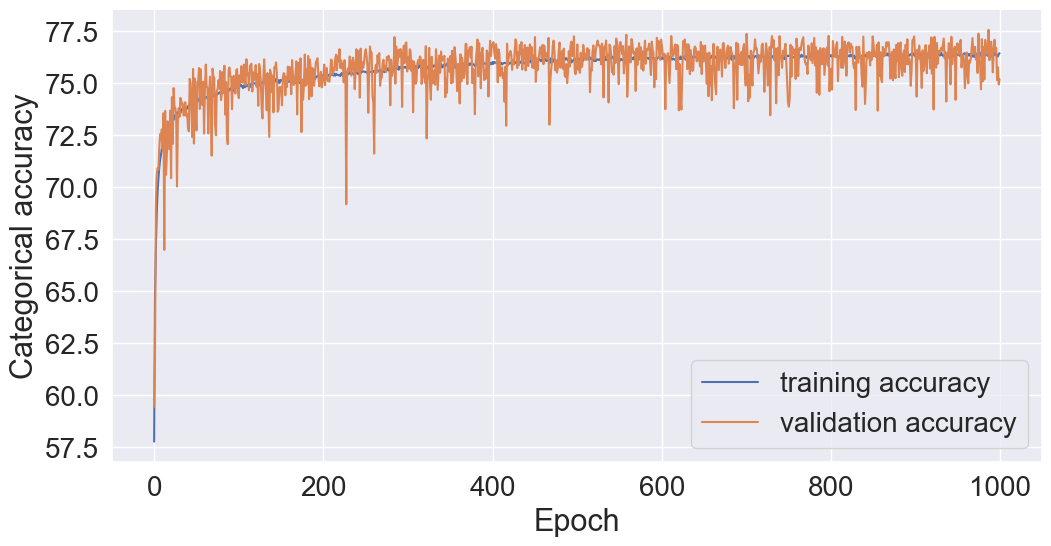

Highest validation accuracy achieved:  77.55300000000001


In [22]:
print("Training and validation loss: Medium Cube vs Big Cube: 2 Grasps, 1000 epochs")
plot_losses(epochs_medium_big_2, training_losses_medium_big_2, validation_losses_medium_big_2, folder_medium_big_2, "")
print("Training and validation accuracy: Medium Cube vs Big Cube: 2 Grasps, 1000 epochs")
plot_accuracies(epochs_medium_big_2, training_accs_medium_big_2, validation_accs_medium_big_2, folder_medium_big_2, "")
print("Highest validation accuracy achieved: ", max(validation_accs_medium_big_2))

#### Cylinder vs Big Cube

Training and validation loss: Cylinder vs Big Cube: 2 Grasps, 1000 epochs


C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


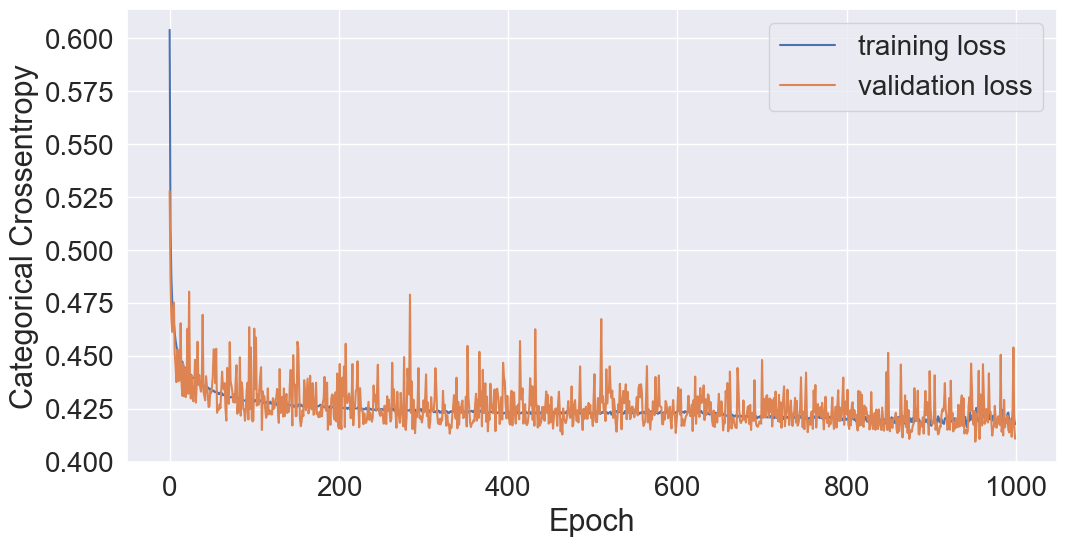

Training and validation accuracy: Cylinder vs Big Cube: 2 Grasps, 1000 epochs


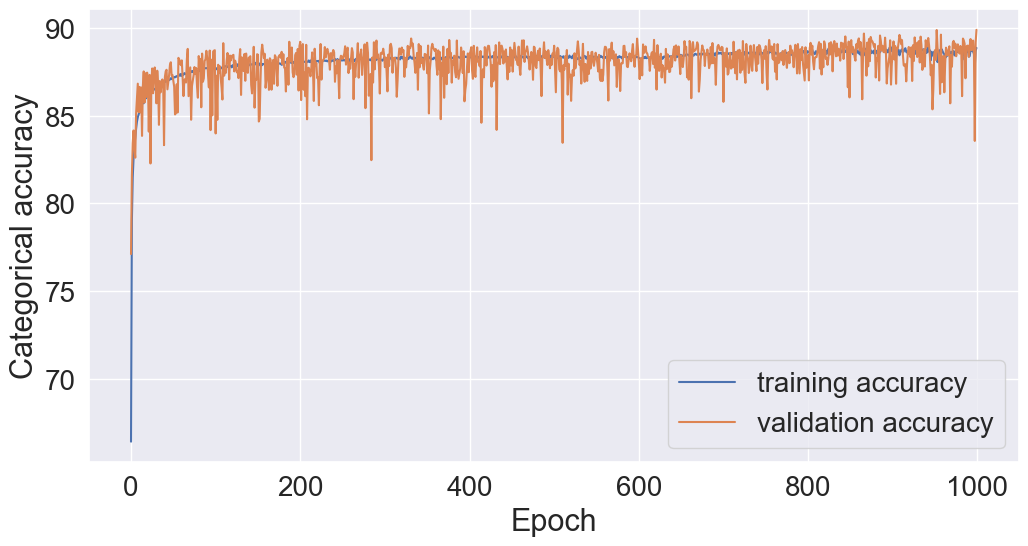

Highest validation accuracy achieved:  89.9


In [23]:
print("Training and validation loss: Cylinder vs Big Cube: 2 Grasps, 1000 epochs")
plot_losses(epochs_cyli_big_2, training_losses_cyli_big_2, validation_losses_cyli_big_2, folder_cyli_big_2, "")
print("Training and validation accuracy: Cylinder vs Big Cube: 2 Grasps, 1000 epochs")
plot_accuracies(epochs_cyli_big_2, training_accs_cyli_big_2, validation_accs_cyli_big_2, folder_cyli_big_2, "")
print("Highest validation accuracy achieved: ", max(validation_accs_cyli_big_2))

### Sequence length: 5

#### Small vs Big Cube 

Training and validation loss: Small Cube vs Big Cube: 5 Grasps, 1000 epochs


C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


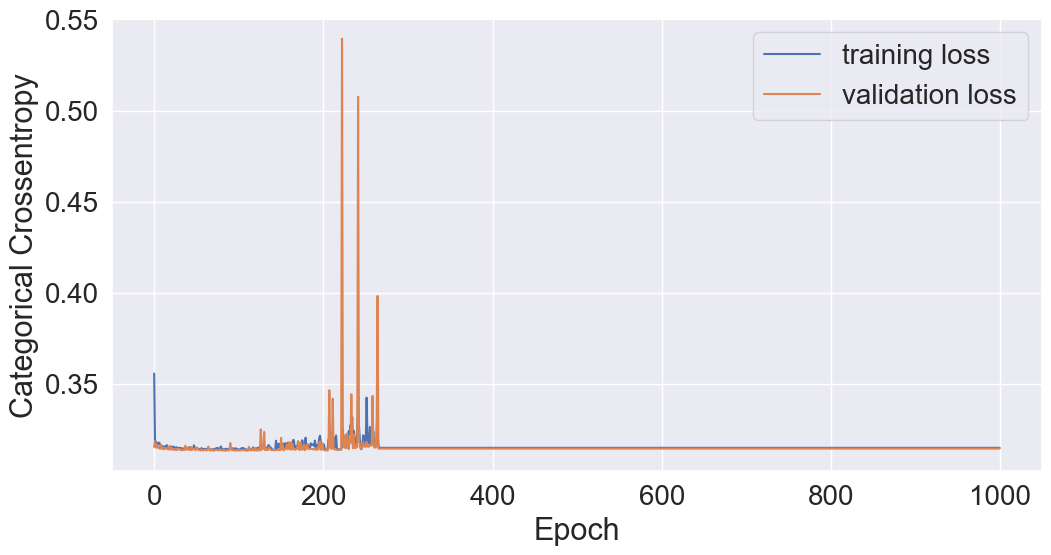

Training and validation accuracy: Small Cube vs Big Cube: 5 Grasps, 1000 epochs


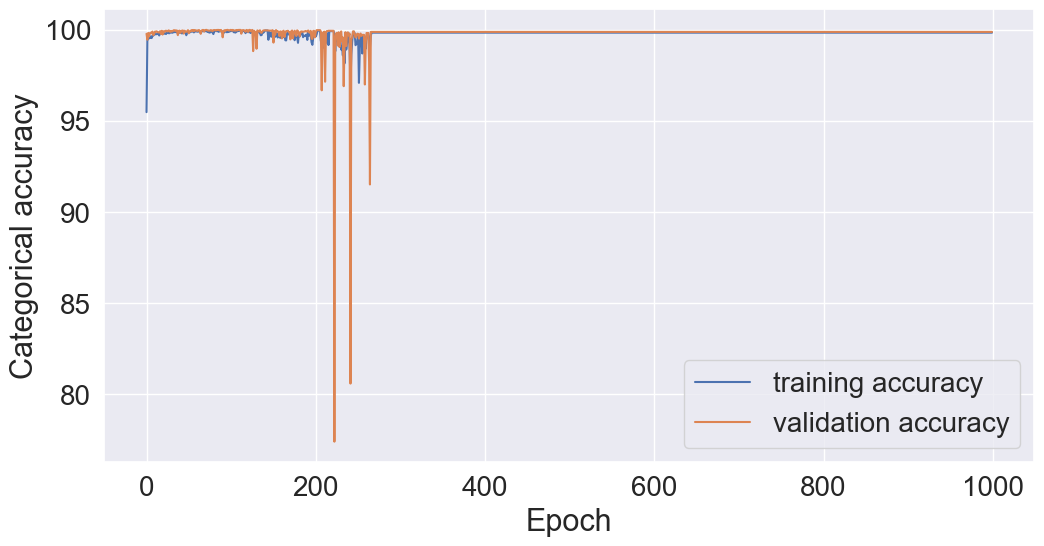

Highest validation accuracy achieved:  99.99


In [24]:
print("Training and validation loss: Small Cube vs Big Cube: 5 Grasps, 1000 epochs")
plot_losses(epochs_small_big_5, training_losses_small_big_5, validation_losses_small_big_5, folder_small_big_5, "")
print("Training and validation accuracy: Small Cube vs Big Cube: 5 Grasps, 1000 epochs")
plot_accuracies(epochs_small_big_5, training_accs_small_big_5, validation_accs_small_big_5, folder_small_big_5, "")
print("Highest validation accuracy achieved: ", max(validation_accs_small_big_5))

#### Medium vs Big Cube 

Training and validation loss: Medium Cube vs Big Cube: 5 Grasps, 1000 epochs


C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


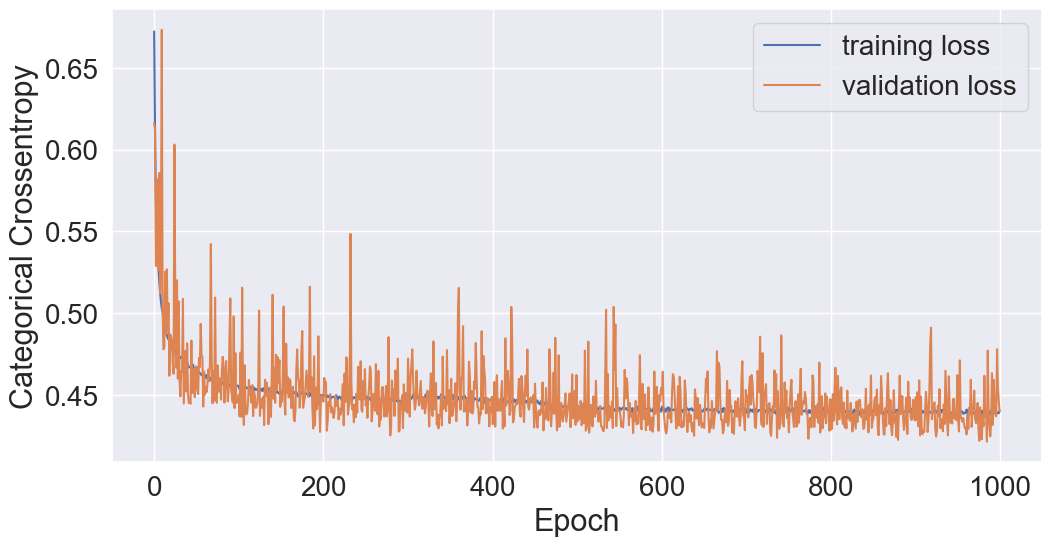

Training and validation accuracy: Medium Cube vs Big Cube: 5 Grasps, 1000 epochs


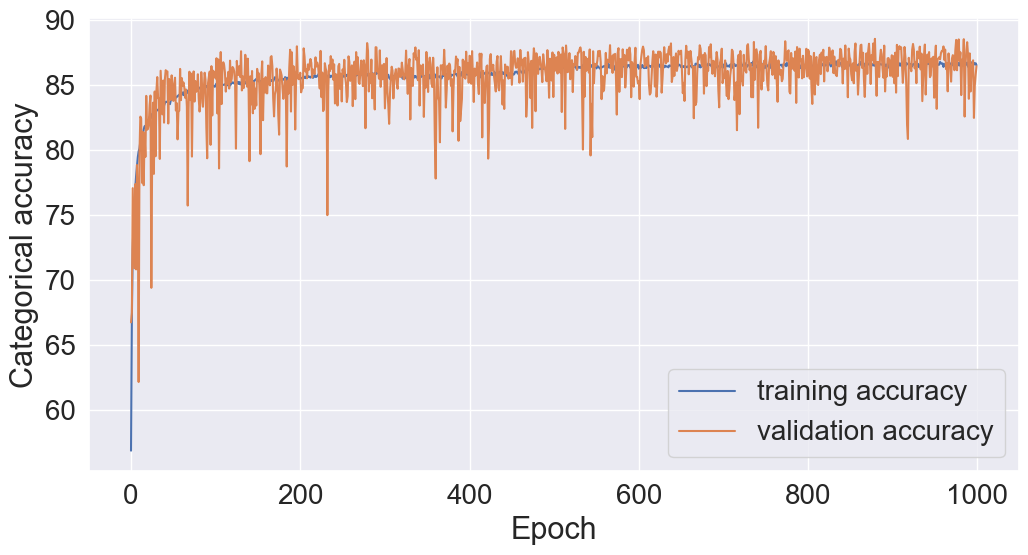

Highest validation accuracy achieved:  88.5475


In [25]:
print("Training and validation loss: Medium Cube vs Big Cube: 5 Grasps, 1000 epochs")
plot_losses(epochs_medium_big_5, training_losses_medium_big_5, validation_losses_medium_big_5, folder_medium_big_5, "")
print("Training and validation accuracy: Medium Cube vs Big Cube: 5 Grasps, 1000 epochs")
plot_accuracies(epochs_medium_big_5, training_accs_medium_big_5, validation_accs_medium_big_5, folder_medium_big_5, "")
print("Highest validation accuracy achieved: ", max(validation_accs_medium_big_5))

#### Cylinder vs Big Cube

Training and validation loss: Cylinder vs Big Cube: 5 Grasps, 1000 epochs


C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


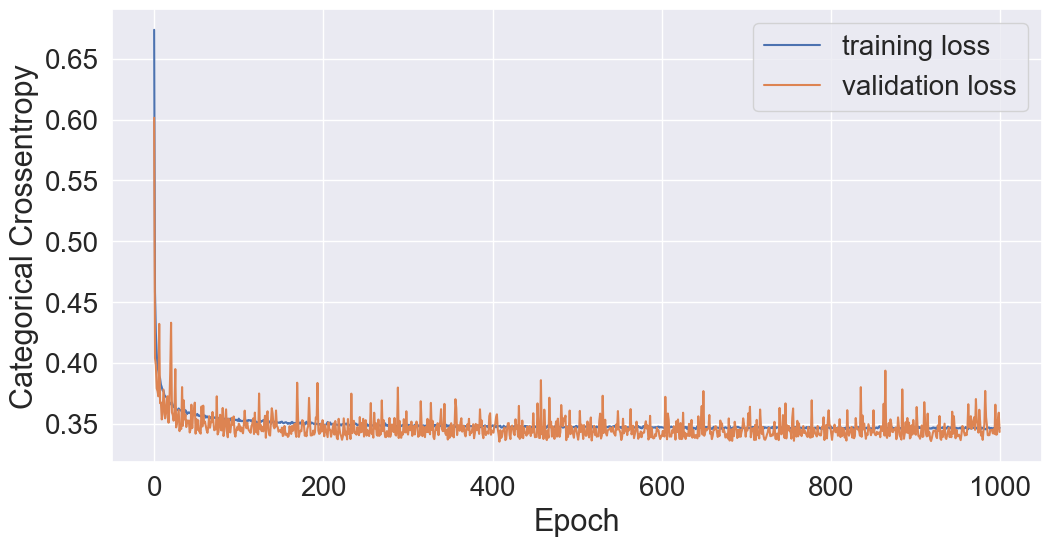

Training and validation accuracy: Cylinder vs Big Cube: 5 Grasps, 1000 epochs


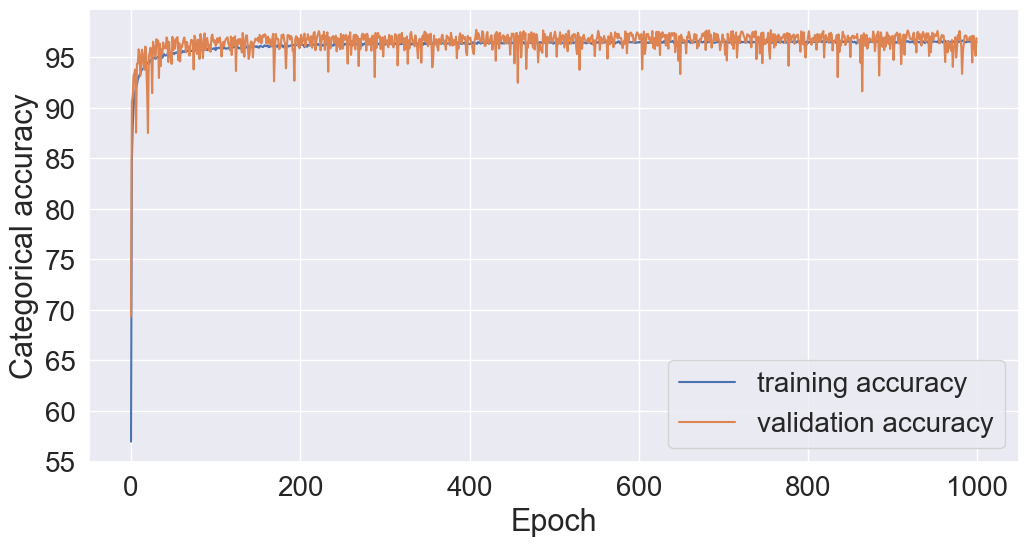

Highest validation accuracy achieved:  97.715


In [26]:
print("Training and validation loss: Cylinder vs Big Cube: 5 Grasps, 1000 epochs")
plot_losses(epochs_cyli_big_5, training_losses_cyli_big_5, validation_losses_cyli_big_5, folder_cyli_big_5, "")
print("Training and validation accuracy: Cylinder vs Big Cube: 5 Grasps, 1000 epochs")
plot_accuracies(epochs_cyli_big_5, training_accs_cyli_big_5, validation_accs_cyli_big_5, folder_cyli_big_5, "")
print("Highest validation accuracy achieved: ", max(validation_accs_cyli_big_5))

### Sequence length: 10

#### Small vs Big Cube 

Training and validation loss: Small Cube vs Big Cube: 10 Grasps, 1000 epochs


C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


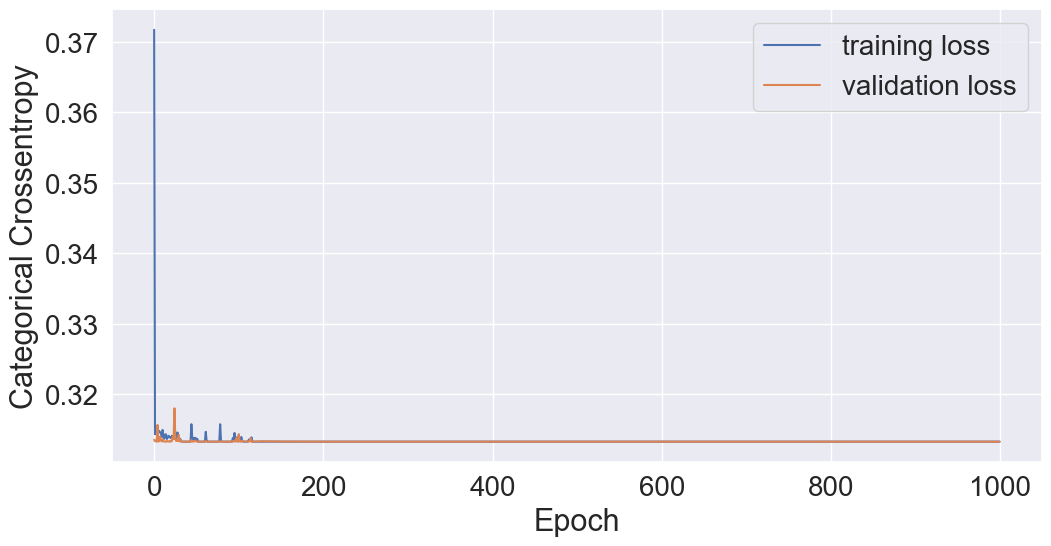

Training and validation accuracy: Small Cube vs Big Cube: 10 Grasps, 1000 epochs


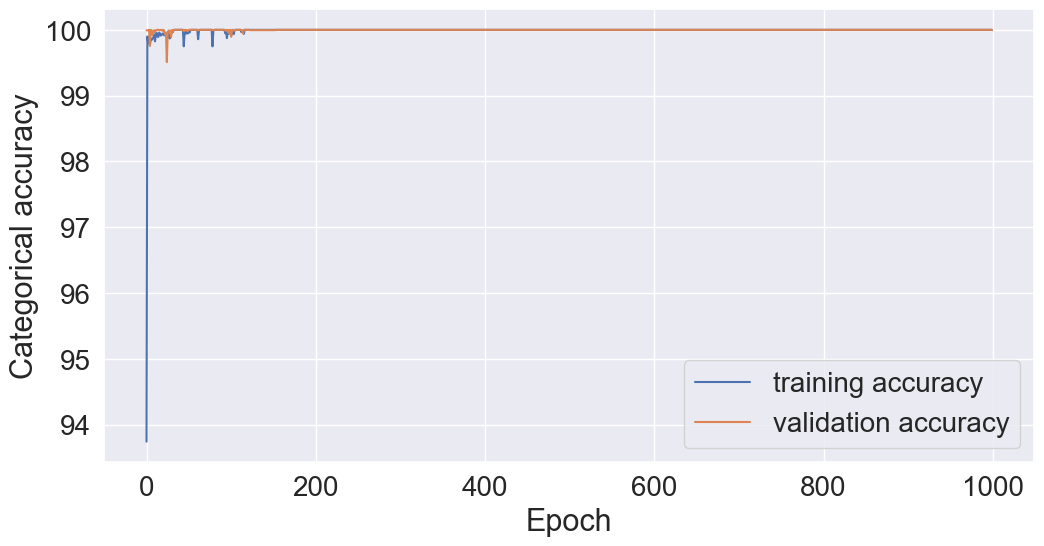

Highest validation accuracy achieved:  100.0


In [27]:
print("Training and validation loss: Small Cube vs Big Cube: 10 Grasps, 1000 epochs")
plot_losses(epochs_small_big_10, training_losses_small_big_10, validation_losses_small_big_10, folder_small_big_10, "")
print("Training and validation accuracy: Small Cube vs Big Cube: 10 Grasps, 1000 epochs")
plot_accuracies(epochs_small_big_10, training_accs_small_big_10, validation_accs_small_big_10, folder_small_big_10, "")
print("Highest validation accuracy achieved: ", max(validation_accs_small_big_10))

#### Medium vs Big Cube 

Training and validation loss: Medium Cube vs Big Cube: 10 Grasps, 1000 epochs


C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


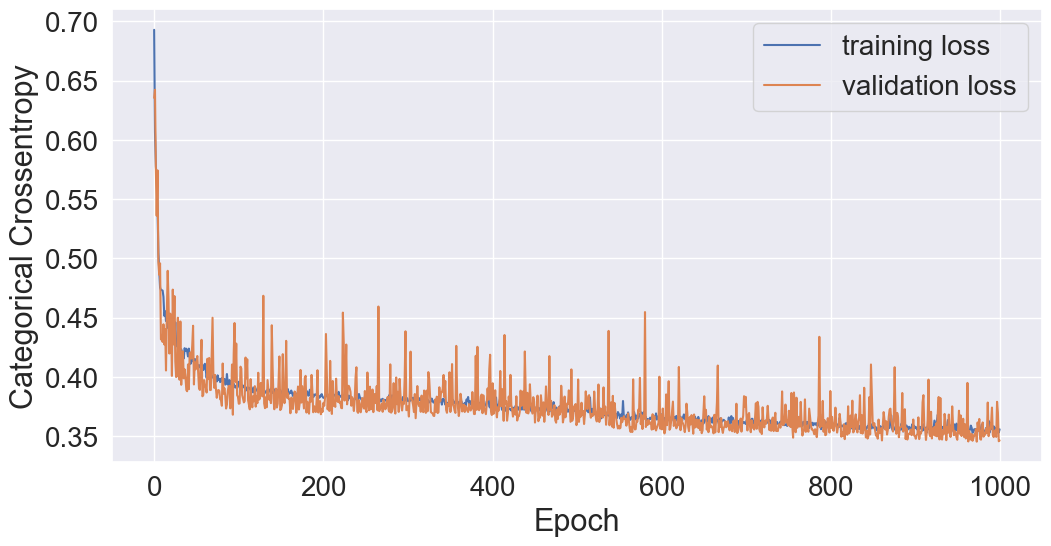

Training and validation accuracy: Medium Cube vs Big Cube: 10 Grasps, 1000 epochs


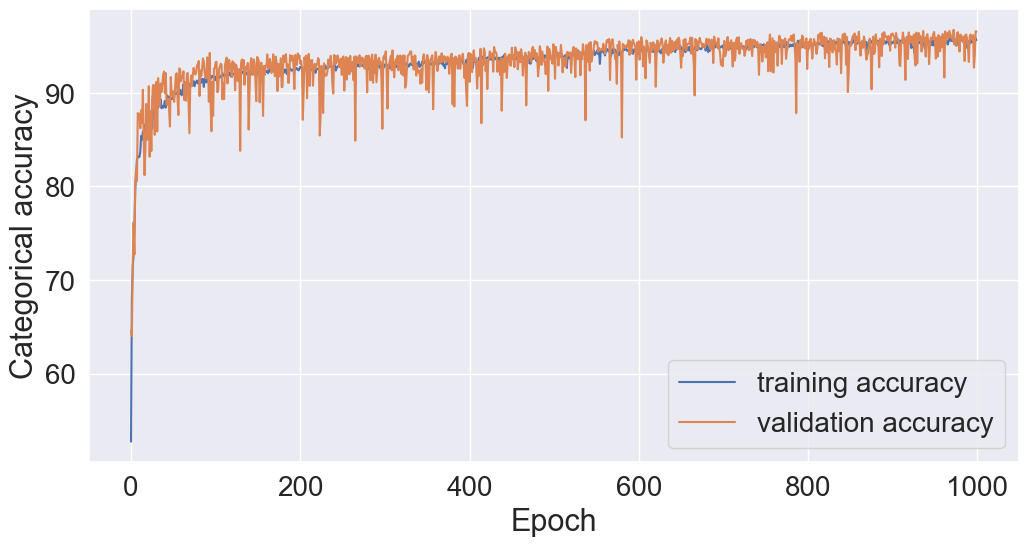

Highest validation accuracy achieved:  96.72500000000001


In [28]:
print("Training and validation loss: Medium Cube vs Big Cube: 10 Grasps, 1000 epochs")
plot_losses(epochs_medium_big_10, training_losses_medium_big_10, validation_losses_medium_big_10, folder_medium_big_10, "")
print("Training and validation accuracy: Medium Cube vs Big Cube: 10 Grasps, 1000 epochs")
plot_accuracies(epochs_medium_big_10, training_accs_medium_big_10, validation_accs_medium_big_10, folder_medium_big_10, "")
print("Highest validation accuracy achieved: ", max(validation_accs_medium_big_10))

#### Cylinder vs Big Cube

Training and validation loss: Cylinder vs Big Cube: 10 Grasps, 1000 epochs


C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


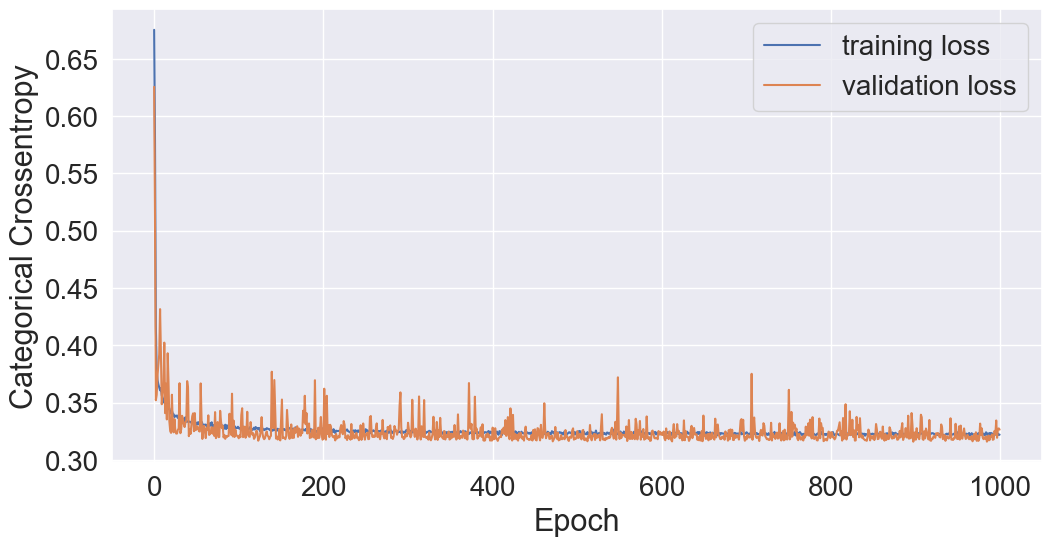

Training and validation accuracy: Cylinder vs Big Cube: 10 Grasps, 1000 epochs


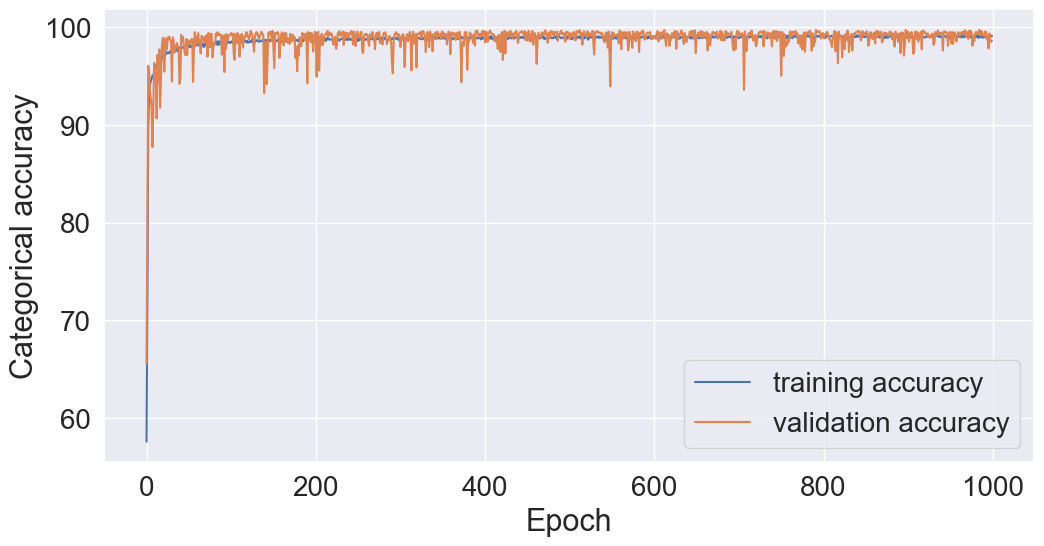

Highest validation accuracy achieved:  99.725


In [29]:
print("Training and validation loss: Cylinder vs Big Cube: 10 Grasps, 1000 epochs")
plot_losses(epochs_cyli_big_10, training_losses_cyli_big_10, validation_losses_cyli_big_10, folder_cyli_big_10, "")
print("Training and validation accuracy: Cylinder vs Big Cube: 10 Grasps, 1000 epochs")
plot_accuracies(epochs_cyli_big_10, training_accs_cyli_big_10, validation_accs_cyli_big_10, folder_cyli_big_10, "")
print("Highest validation accuracy achieved: ", max(validation_accs_cyli_big_10))

In [30]:
import matplotlib

In [31]:
best_font_size = 20

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


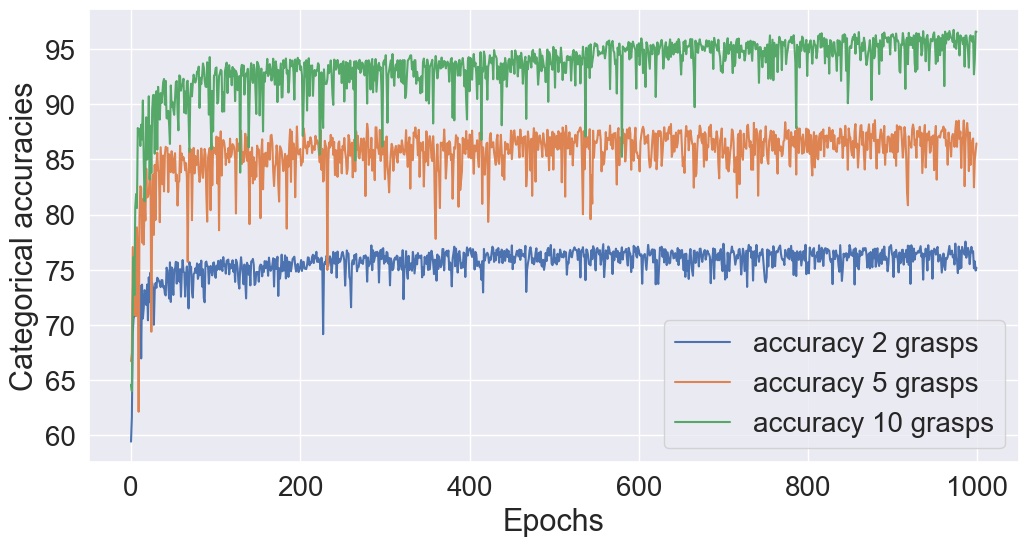

In [33]:
# Plotting the a 
folder_plot = path.abspath(path.join(basepath, "..", "Figures/Training/500k_Data_Set/Big_Cube_and_Medium_Cube"))
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(epochs_medium_big_10, validation_accs_medium_big_2, label = "accuracy 2 grasps")
plt.plot(epochs_medium_big_10, validation_accs_medium_big_5, label = "accuracy 5 grasps")
plt.plot(epochs_medium_big_10, validation_accs_medium_big_10, label = "accuracy 10 grasps")
plt.xlabel("Epochs", Fontsize = best_font_size+2)
plt.ylabel("Categorical accuracies",  Fontsize = best_font_size+2)
# plt.title("")
plt.legend(loc='lower right', prop={"size":best_font_size})
plt.xticks(fontsize=best_font_size)
plt.yticks(fontsize=best_font_size)
plt.savefig(folder_plot + "/Simi_obj_comparing_accuracies_" + str(len(epochs_medium_big_10)) + "_epochs.png")
plt.show()

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


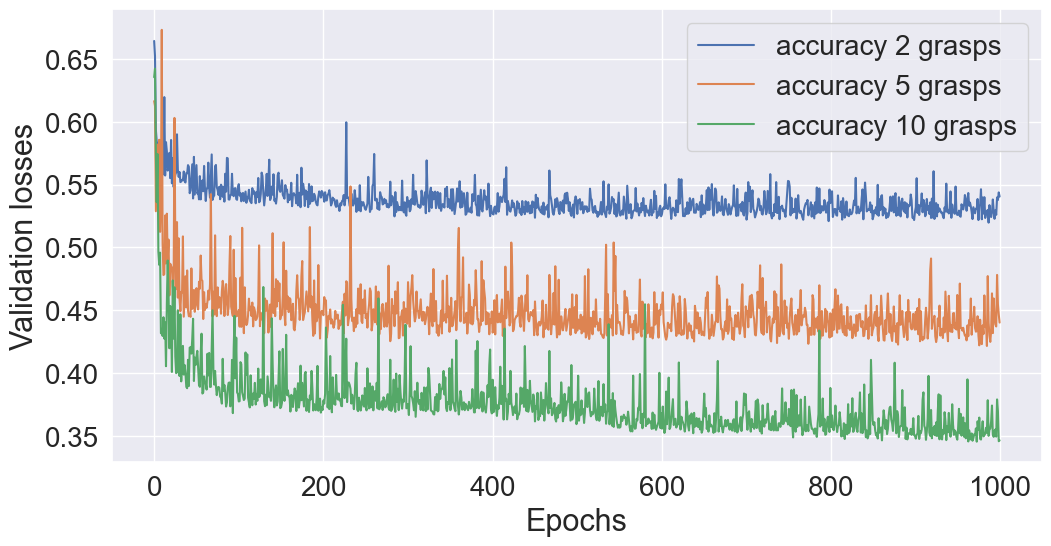

In [34]:
# Plotting the accs 
folder_plot = path.abspath(path.join(basepath, "..", "Figures/Training/500k_Data_Set/Big_Cube_and_Medium_Cube"))
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(epochs_medium_big_10, validation_losses_medium_big_2, label = "accuracy 2 grasps")
plt.plot(epochs_medium_big_10, validation_losses_medium_big_5, label = "accuracy 5 grasps")
plt.plot(epochs_medium_big_10, validation_losses_medium_big_10, label = "accuracy 10 grasps")
plt.xlabel("Epochs",  Fontsize = best_font_size+2)
plt.ylabel("Validation losses",  Fontsize = best_font_size+2)
# plt.title("")
plt.legend(loc='upper right', prop={"size":best_font_size})
plt.xticks(fontsize=best_font_size)
plt.yticks(fontsize=best_font_size)
plt.savefig(folder_plot + "/Simi_obj_comparing_losses_" + str(len(epochs_medium_big_10)) + "_epochs.png")
plt.show()